In [1]:
# Write your comments to the tasks right into the notebook
# Also it is recommended to check sklearn documentation, especially
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# https://scikit-learn.org/stable/modules/clustering.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.cluster.pair_confusion_matrix.html#sklearn.metrics.cluster.pair_confusion_matrix
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.fowlkes_mallows_score.html#sklearn.metrics.fowlkes_mallows_score

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, fowlkes_mallows_score
from sklearn.metrics.cluster import pair_confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# We will fetch MNIST datasets (images of digits)

X, y = fetch_openml(
    "mnist_784", version=1, return_X_y=True, as_frame=False
)

X.shape, y.shape

((70000, 784), (70000,))

In [4]:
# We will only work with first 1000 images

images = X[:1000]
labels = y[:1000].astype(np.int32)

labels[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=int32)

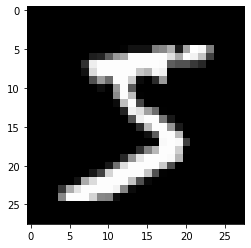

In [5]:
# This is the first image
plt.imshow(images[0].reshape(28,28), cmap="gray")

In [6]:
# Now we will try to find 10 clusters using K-means

kmeans = KMeans(n_clusters=10, random_state=47)
kmeans.fit(images)

cluster_ids = kmeans.predict(images)

cluster_ids[:5]

array([9, 5, 6, 7, 6], dtype=int32)

In [7]:
# We will calculate confusion matrix (rows are original labels, columns are clusters)
# Here, first cluster contains mostly zeros, but zeroes are also present in the 6th cluster
# Second cluster is mix of almost everything.

confusion_matrix(labels, cluster_ids)

array([[34,  1,  4,  0,  0, 50,  3,  0,  5,  0],
       [ 0, 52,  0,  0,  1,  0,  1, 62,  0,  0],
       [ 0, 21,  2,  2,  4,  1,  4,  9, 50,  6],
       [ 1, 12,  0,  1,  8,  0,  2,  0,  1, 68],
       [ 0, 10,  2, 35,  0,  0, 55,  3,  0,  0],
       [ 2, 38,  2,  1,  2,  1,  5,  0,  1, 40],
       [ 2, 11, 71,  0,  0,  0,  8,  1,  1,  0],
       [ 0, 14,  0, 67,  0,  0, 27,  8,  1,  0],
       [ 0, 18,  0,  0, 56,  0,  4,  2,  0,  7],
       [ 0,  9,  1, 47,  0,  1, 36,  4,  0,  2]])

In [8]:
# We can also calculate pair confusion matrix.
# That means that we count number of pairs which have same label and also belong to same cluster.
# And also number of pairs, which have different labels, but are in same clusters, ...

cmat = pair_confusion_matrix(labels, cluster_ids)
cmat

array([[820936,  78166],
       [ 57408,  42490]])

In [9]:
# To get this into one number we will just use Fowlkles mallow score (read docs about what it is)
# In the next tasks we will try to maximize this

print("FM score", fowlkes_mallows_score(labels, cluster_ids))

FM score 0.387020413484907


In [10]:
# Task A:
# Change the seed (random state)
# What happened?
# Why did it happen?

In [11]:
# Task B:
# Try to find best number of clusters for Fowlkles mallow score 
# Does finding from task A influnce your algorithm here?

In [12]:
# Task C:
# Look into data and try to explain why 10 might not be the best number of clusters
# Hint: Is there any difference between same numbers assigned to different clusters?

In [13]:
# Task D:
# Try either some preprocessing (decorelation of data or some simple image transformation)
# or some other clustering algorithm to get clustering with higher Fowlkles mallow score 